# SIR Model of Disease Dynamics 

## SIR Model

### Description

It is a simplified model to simulate an Epidemic.
This is formulated over the given observations:

1. Before start of the epidemic, the population is **at risk** of **catching disease**.

2. There is **spread** from **infected** to **susceptible** people.

3. People **loose** their **infection** after some time.

4. Recovered people **don't get infected** again, hence becoming **removed**.


5. All other differences between people are to be ignored.


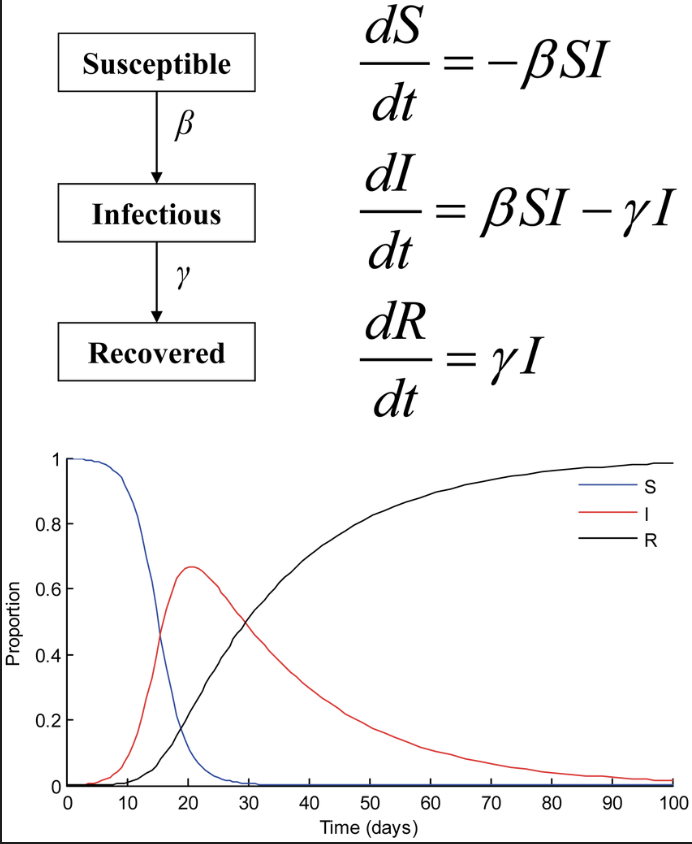

_Modeling Transmission Dynamics and Control of Vector-Borne Neglected Tropical Diseases - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/SIR-model-Schematic-representation-differential-equations-and-plot-for-the-basic-SIR_fig2_47676805 [accessed 28 Dec, 2023]_

### Equations

1. Susceptible population:
   $$ S_{i+1} = S_i - \left( \lambda \times S_i \times I_i \times \Delta t \right) $$

2. Infected population:
   $$ I_{i+1} = I_i + \left( \lambda \times S_i \times I_i \times \Delta t \right) - \left( \gamma \times I_i \times \Delta t \right) $$

3. Recovered population:
   $$ R_{i+1} = R_i + \left( \gamma \times I_i \times \Delta t \right) $$

For the parameter description:

- $ S_i $ : susceptible population (individuals who haven't contracted the disease).
- $ I_i $ : infected population (individuals currently infected with the disease).
- $ R_i $ : recovered population (individuals who have recovered and gained immunity).
- $ \lambda $ : transmission rate or the rate of spread of the disease.
- $ \gamma $ : recovery rate, indicating how quickly infected individuals recover from the disease.
- $ \Delta t $ : time step, representing the size of the time intervals at which the model is updated.

## Simulation

Importing Pakages, activating `gr` Plot backend

In [3]:
using Printf
using Plots
gr()

Plots.GRBackend()

### Update Step

In [49]:
function updateSIR(params)
    s1 = params[1]
    i1 = params[2]
    r1 = params[3]

    s_next = s1 - (λ * s1 * i1 * dt)
    i_next = i1 + (λ * s1 * i1 * dt) - (γ * i1 * dt) 
    r_next = r1 + (γ * i1 * dt)

    return [s_next, i_next, r_next]
end

updateSIR (generic function with 1 method)

### Initialization

In [50]:
# Parameters
dt = 0.4
λ = 1/20000.
γ = 1/10.
tfinal = 610
s0 = 10000
i0 = 4.
r0 = 1.

# Init. Values
nsteps = round(Int64, tfinal / dt)
resultvec = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)

resultvec[1, :] = [s0, i0, r0]
timevec[1] = 0.

0.0

### Running Sim

This runs the simulation to calculate `tfinal` days of the epidemic based on teh parameters defined above

In [51]:
for step in 1:nsteps
    resultvec[step + 1, :] = updateSIR(resultvec[step, :])
    timevec[step+1] = timevec[step] + dt
end

### Plotting

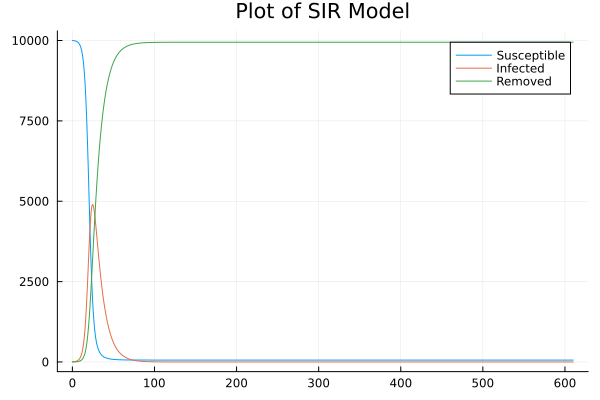

In [52]:
function plotSIR()
    plot(timevec, resultvec,
    labels = (["Susceptible" "Infected" "Removed"]),
    legend = :topright,
    title = "Plot of SIR Model")
end

plotSIR()

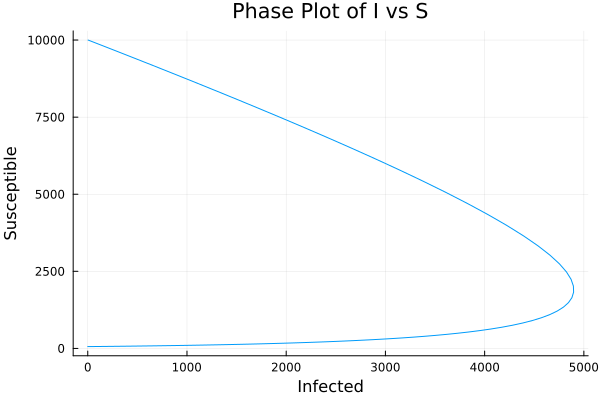

In [46]:
function plotSIRPhase(options)

    optionsarr = ["S", "I", "R"]
    labels = ["Susceptible", "Infected", "Removed"]
    
    xoption = findfirst(x -> x == options[1], optionsarr)
    yoption = findfirst(x -> x == options[2], optionsarr)

    plot(resultvec[:, xoption], resultvec[:, yoption],
    xlabel = labels[xoption],
    ylabel = labels[yoption],
    legend = false,
    title = @sprintf("Phase Plot of %s vs %s", optionsarr[xoption], optionsarr[yoption])
    )    
end

plotSIRPhase(["I", "S"])

## Threshold Prediction

- $\gamma / \lambda$ is also called $q$ or Contact Ratio along with Threshold Value.

- It is the key factor which decides if the Epidmic will spread

- $S > q$ is the condition for the Epidmic to spread, or else it just dies out

- This is also closely related to $R$ value of the disease. Which is just $q * S$

## Duration of Infectiousness

- Duration of illness is defined by $1/\gamma$, If we take the assumption that as many people get ill as they are recovering.

- For `EVD`, The Recovery time on average is **3 weeks**

- Giving us, $1/\gamma \approx 21$ or $\gamma = 0.05$

## Further estimation of $\lambda$ 

- $S(0)$ parameter is the total constant population which are at risk of catching the disease.

- For the `EVD` Epidemic, It comes out to be $S(0) = 2.2 * 10^7$ _(the total population of Guiena, Liberia, Sierra Leone at the time)_

- Using $S_0 = \gamma / \lambda$, We get $\lambda = 2.2 * 10^{-9}$

## Next Steps...

- In the next notebook we will try to apply SIR Model to the `EVD` Epidemic  data and check for accuracy of our model side by side